$K$-means Flat

\begin{align} \mathrm{Inertia} &= \sum(\bar{x}_c - x_i)^2 \\
 Centroids &= \bar{x}_c = \text{Center of clusters}\\
 Data\,Points &= x_i \\
\mathrm{Inertia} &= \text{Sum((Centroid of Cluster) - (Data Points))}^2 \\
 Centroids &= means\end{align}

K-means tends to select equally sized clusters.

Step 1: PCA 
Step 2: K-means

In [98]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import style
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

In [99]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)
X = df.iloc[:, :13].replace('?', 0)
y = df.iloc[:, 13]
y = np.where(y > 0, 0, 1)
# 1 = heart disease
# 0 = No diagnosis.

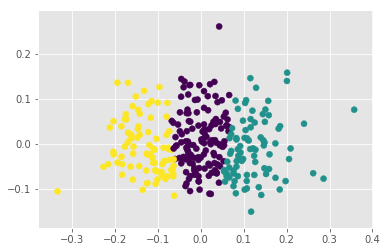

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      65  70
1      25  61
2      49  33
Centroids: 
 [[ 0.00080609  0.00995565]
 [ 0.12336992 -0.0101634 ]
 [-0.13071506 -0.00573122]]


In [153]:
X_nrm = normalize(X)
# df_new = pd.DataFrame(data=X_nrm)
X_pca = PCA(2).fit_transform(X_nrm) 
km = KMeans(n_clusters=3, random_state=0)
y_prd = km.fit_predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_prd)
plt.show()
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_prd, y))
print('Centroids: \n', km.cluster_centers_)

In [155]:
minibatch = MiniBatchKMeans(init='random',
                            n_clusters=3,
                            batch_size=200)
minibatch.fit(X_pca)
predict_mini = minibatch.predict(X_pca)
print('Comparing k-means and mini batch k-means solutions: ')
print(pd.crosstab(predict_mini, y_prd))

Comparing k-means and mini batch k-means solutions: 
col_0   0   1   2
row_0            
0      46   0  82
1      43  35   0
2      46  51   0
